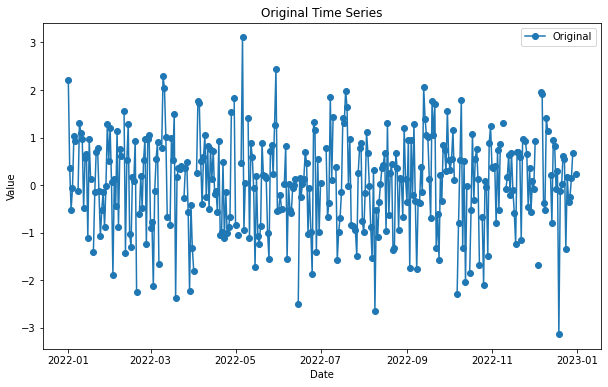

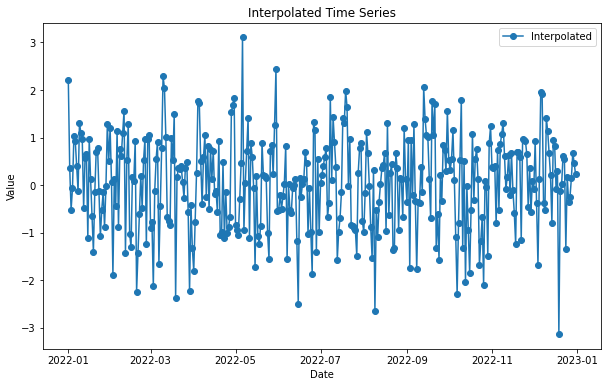

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Use this code to interpolate missing values with linear interpolation
# last edit 15.06.2023 by Mathis Pohl

##################### This is just a test dataset #####################

# Create a sample time series with missing values
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
values = np.random.randn(len(dates))
missing_mask = np.random.choice([True, False], size=len(dates), p=[0.1, 0.9])

# Set some values as missing
values[missing_mask] = np.nan

#########################################################################

# Create a DataFrame from the date and value arrays
data = pd.DataFrame({'Date': dates, 'Value': values})

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series')
plt.legend()
plt.show()

# Interpolate missing values

# Find the indices of missing values
missing_indices = np.where(np.isnan(data['Value']))[0]

# Find the indices of non-missing values
non_missing_indices = np.where(~np.isnan(data['Value']))[0]

# Create an interpolation function using the non-missing indices and values
interp_func = interp1d(non_missing_indices, data['Value'][non_missing_indices], kind='linear')

# Use the interpolation function to calculate interpolated values for missing indices
interpolated_values = interp_func(missing_indices)

# Replace missing values with interpolated values in the DataFrame
data.loc[missing_indices, 'Value'] = interpolated_values

# Plot the interpolated time series
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Value'], 'o-', label='Interpolated')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Interpolated Time Series')
plt.legend()
plt.show()
